<a href="https://colab.research.google.com/github/yeshwanth098/AIML/blob/main/AIML_LAB_(11_09_24).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import norm

url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)
print(df.head())

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


In [ ]:
X = df[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']]
y = df['medv']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
coefficients = model.params
standard_errors = model.bse
t_statistics = coefficients / standard_errors

cdf_values = norm.cdf(coefficients)

sorted_coefficients = coefficients.sort_values(key=lambda x: norm.cdf(x))
print("Coefficients:\n", coefficients)

Coefficients:
 const      36.459488
crim       -0.108011
zn          0.046420
indus       0.020559
chas        2.686734
nox       -17.766611
rm          3.809865
age         0.000692
dis        -1.475567
rad         0.306049
tax        -0.012335
ptratio    -0.952747
b           0.009312
lstat      -0.524758
dtype: float64


In [ ]:
print("\nStandard Errors:\n", standard_errors)


Standard Errors:
 const      5.103459
crim       0.032865
zn         0.013727
indus      0.061496
chas       0.861580
nox        3.819744
rm         0.417925
age        0.013210
dis        0.199455
rad        0.066346
tax        0.003761
ptratio    0.130827
b          0.002686
lstat      0.050715
dtype: float64


In [ ]:
print("\nT-statistics:\n", t_statistics)


T-statistics:
 const       7.144074
crim       -3.286517
zn          3.381576
indus       0.334310
chas        3.118381
nox        -4.651257
rm          9.116140
age         0.052402
dis        -7.398004
rad         4.612900
tax        -3.280009
ptratio    -7.282511
b           3.466793
lstat     -10.347146
dtype: float64


In [ ]:
print("\nCDF Values:\n", cdf_values)



CDF Values:
 [1.00000000e+00 4.56993341e-01 5.18512435e-01 5.08201128e-01
 9.96392279e-01 6.41027098e-71 9.99930479e-01 5.00276158e-01
 7.00301055e-02 6.20216513e-01 4.95079334e-01 1.70359078e-01
 5.03714770e-01 2.99875585e-01]


In [ ]:
print("\nSorted Coefficients by CDF:\n", sorted_coefficients)


Sorted Coefficients by CDF:
 nox       -17.766611
dis        -1.475567
ptratio    -0.952747
lstat      -0.524758
crim       -0.108011
tax        -0.012335
age         0.000692
b           0.009312
indus       0.020559
zn          0.046420
rad         0.306049
chas        2.686734
rm          3.809865
const      36.459488
dtype: float64


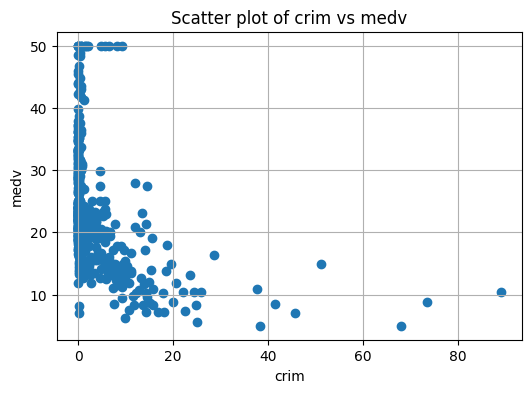

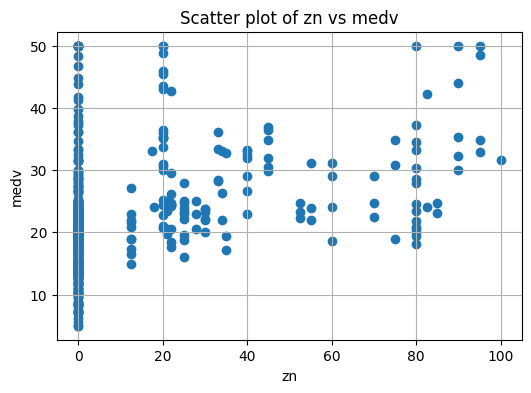

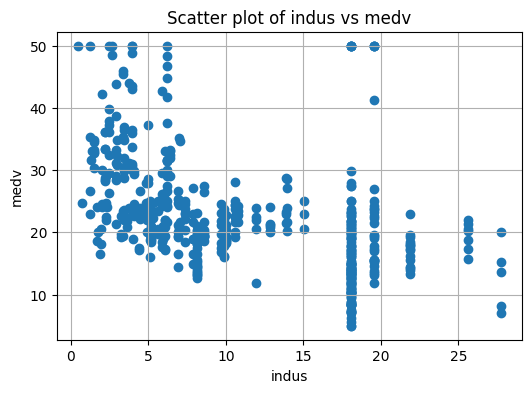

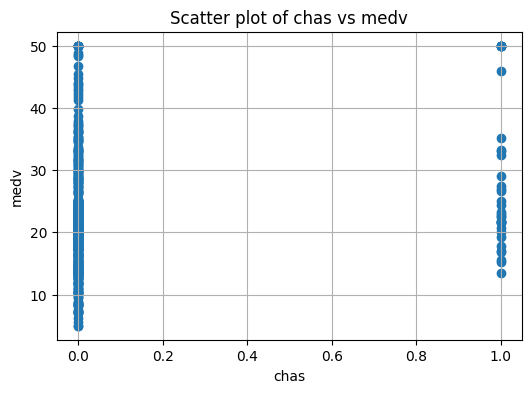

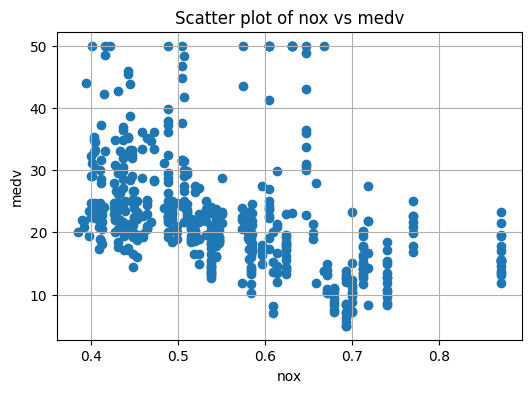

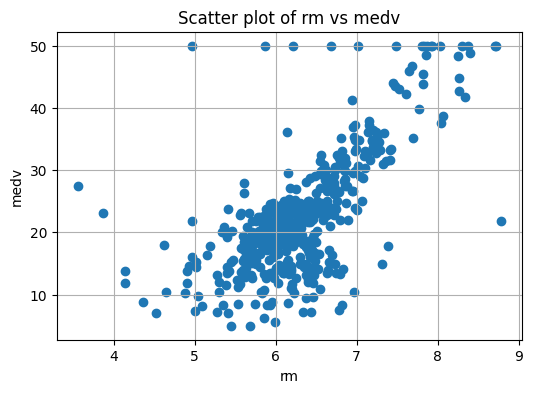

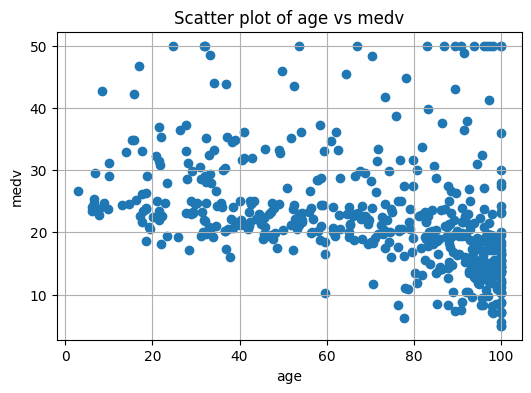

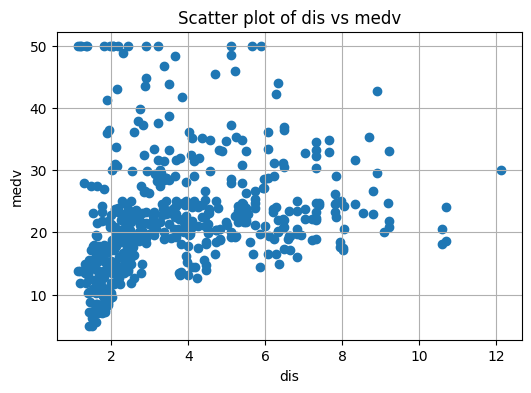

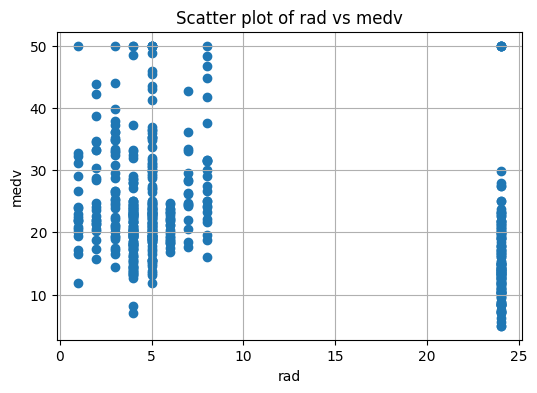

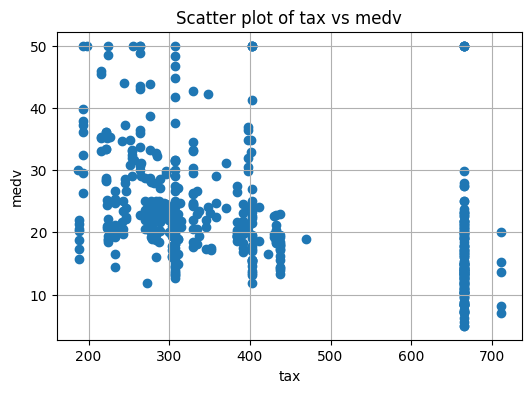

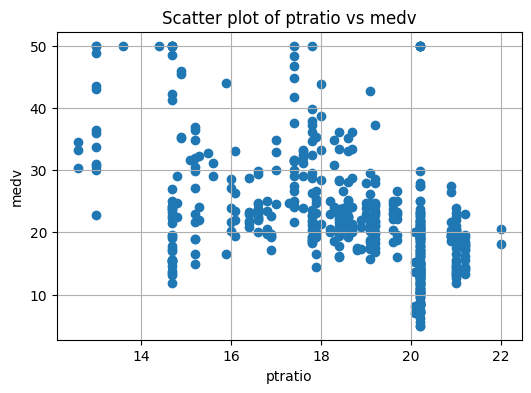

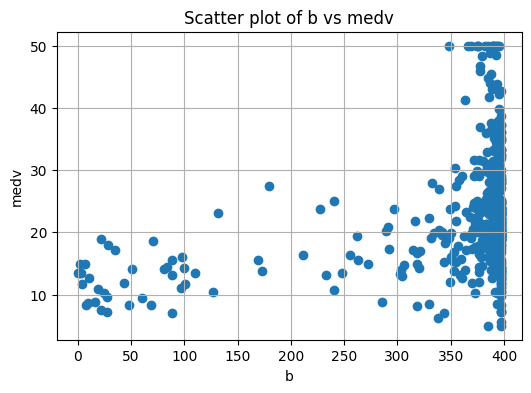

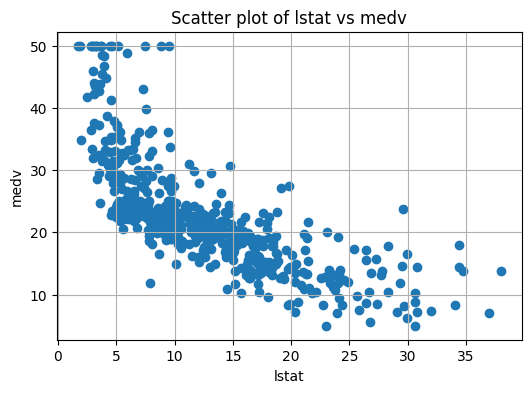

In [ ]:
for feature in X.columns[1:]:
    plt.figure(figsize=(6,4))
    plt.scatter(df[feature], df['medv'])
    plt.xlabel(feature)
    plt.ylabel('medv')
    plt.title(f'Scatter plot of {feature} vs medv')
    plt.grid(True)
    plt.show()

In [ ]:
import pandas as pd
import statsmodels.api as sm
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)
X = df[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']]
y = df['medv']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
y_pred = model.predict(X)
min_observed = y.min()
max_observed = y.max()

min_expected = y_pred.min()
max_expected = y_pred.max()

print(f"Observed Price (Min, Max): ({min_observed}, {max_observed})")
print(f"Expected Price (Min, Max): ({min_expected}, {max_expected})")

min_value = min(min_observed, min_expected)
max_value = max(max_observed, max_expected)

print(f"MinMax Range between Observed and Expected Prices: ({min_value}, {max_value})")

Observed Price (Min, Max): (5.0, 50.0)
Expected Price (Min, Max): (-4.281310709184915, 44.67308338731289)
MinMax Range between Observed and Expected Prices: (-4.281310709184915, 50.0)
